In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [11]:
import matplotlib as mpl
import matplotlib.font_manager as fm

# Set font
font_path = 'TaipeiSansTCBeta-Regular.ttf'  
fm.fontManager.addfont(font_path)
prop = fm.FontProperties(fname=font_path)
mpl.rcParams['font.sans-serif'] = [prop.get_name()]
mpl.rcParams['axes.unicode_minus'] = False  

# Check font
print(f"Using font: {prop.get_name()}")

Using font: Taipei Sans TC Beta


## Facebook post from Politicians

In [3]:
data = pd.read_csv('facebook_data\post_data.csv')
data.head(2)

,politician,time,link,content,comment_count,days_to_election,party,text_comment_count
0,劉仁照,2023-09-01 12:32:19,https://www.facebook.com/vlog72/posts/72668424...,今天是 #記者節，感謝許多為新聞報導奔波的記者朋友們，讓我們能透過新聞內容，得知各地大小事。...,12,133,民進黨,3
1,劉仁照,2023-09-01 20:39:15,https://www.facebook.com/vlog72/posts/72690544...,#海葵 颱風，海上颱風警報正式發佈 這是近四年來首個登陸台灣的穿心颱，預計9月3日登陸花蓮，...,11,133,民進黨,6


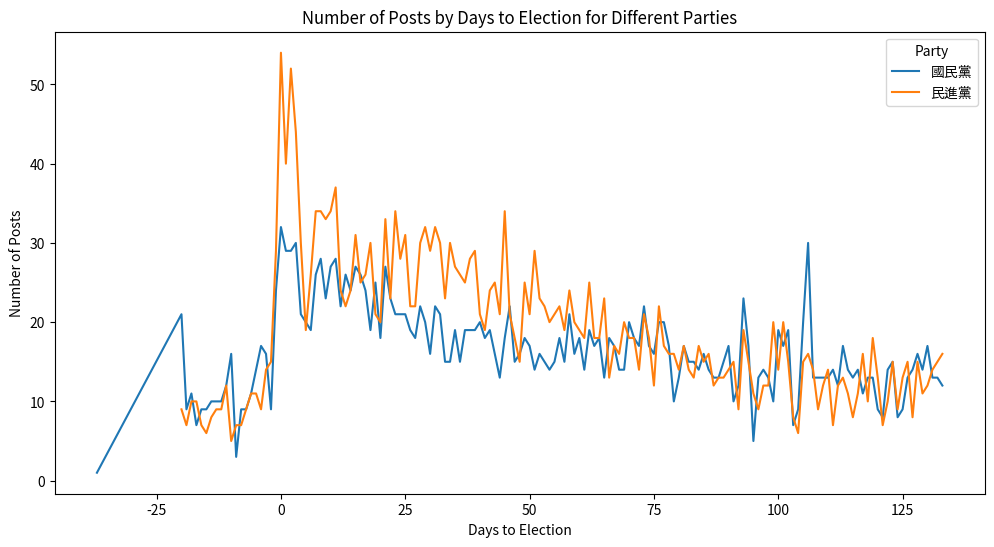

In [5]:
# Show the number of posts for each party
daily_post_counts = data.groupby(['days_to_election', 'party']).size().reset_index(name='post_count')

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_post_counts, x='days_to_election', y='post_count', hue='party')
plt.xlabel("Days to Election")
plt.ylabel("Number of Posts")
plt.title("Number of Posts by Days to Election for Different Parties")
plt.legend(title='Party')
plt.show()

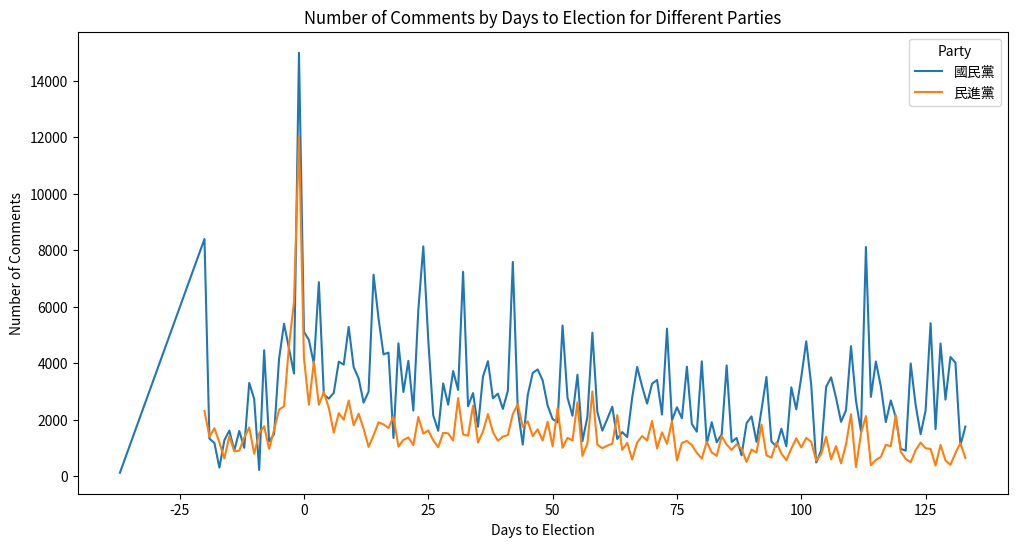

In [10]:
# Show the number of comments for each party
data['comment_count'] = pd.to_numeric(data['comment_count'], errors='coerce')

daily_comment_counts = data.groupby(['days_to_election', 'party'])['comment_count'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_comment_counts, x='days_to_election', y='comment_count', hue='party')
plt.xlabel("Days to Election")
plt.ylabel("Number of Comments")
plt.title("Number of Comments by Days to Election for Different Parties")
plt.legend(title='Party')
plt.show()


Post Frequency Trends:
 - Both parties' post frequencies fluctuate as the election date approaches.
 - There is a noticeable increase in the number of posts for both parties close to the election day, with a peak just before the election.
 - After the election day, the frequency of posts decreases for both parties, showing less engagement post-election.

Comment Volume Trends:
 - The volume of comments follows a similar trend to the post frequency, with higher engagement closer to the election date.
 - Peaks in comment volume occur around the election day, especially for the blue line (presumably one of the parties, as shown in the legend).
 - Unlike posts, the comment volume shows more variability over time, with several spikes even after the election day.

Comparison Between Parties:
 - The blue party appears to receive more comments than the orange party, especially as the election day nears and after it.
 - Both parties have similar posting frequencies, but the level of public engagement, as indicated by comments, is significantly higher for the blue party.

Engagement Patterns:
 - There is a strong correlation between the days leading up to the election and the engagement (both posts and comments), indicating higher public interest as the election day approaches.
